<a href="https://colab.research.google.com/github/yashjagtap81/handsonproject/blob/main/Shotgun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import zipfile
import os
import keras
from keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [3]:
zip_file_name = '/content/shotgun1.zip'
base_dir = '/content/shotgun/'
os.makedirs(base_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(base_dir)

img_size = 224
batch = 64

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  validation_split=0.2)

train_datagen = train_datagen.flow_from_directory(base_dir,
                                                  target_size=(
                                                      img_size, img_size),
                                                  subset='training',
                                                  batch_size=batch)
test_datagen = test_datagen.flow_from_directory(base_dir,
                                                target_size=(
                                                    img_size, img_size),
                                                subset='validation',
                                                batch_size=batch)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Activation

model = Sequential()


model.add(Conv3D(filters=64, kernel_size=(3, 3, 3), padding='same',
                activation='relu', input_shape=(16, 224, 224, 3)))
model.add(MaxPooling3D(pool_size=(2, 2, 1)))


model.add(Conv3D(filters=64, kernel_size=(3, 3, 3), padding='same', activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 1)))

model.add(Conv3D(filters=64, kernel_size=(3, 3, 3), padding='same', activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 1)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d_3 (Conv3D)               │ (None, 16, 224, 224,   │         5,248 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_3 (MaxPooling3D)  │ (None, 8, 112, 224,    │             0 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_4 (Conv3D)               │ (None, 8, 112, 224,    │       110,656 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_4 (MaxPooling3D)  │ (None, 4, 56, 224, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_5 (Conv3D)               │ (None, 4, 56, 224, 64) │       110,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_5 (MaxPooling3D)  │ (None, 2, 28, 224, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 802816)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │   411,042,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,271,429 (1.53 GB)

 Trainable params: 411,271,429 (1.53 GB)

 Non-trainable params: 0 (0.00 B)

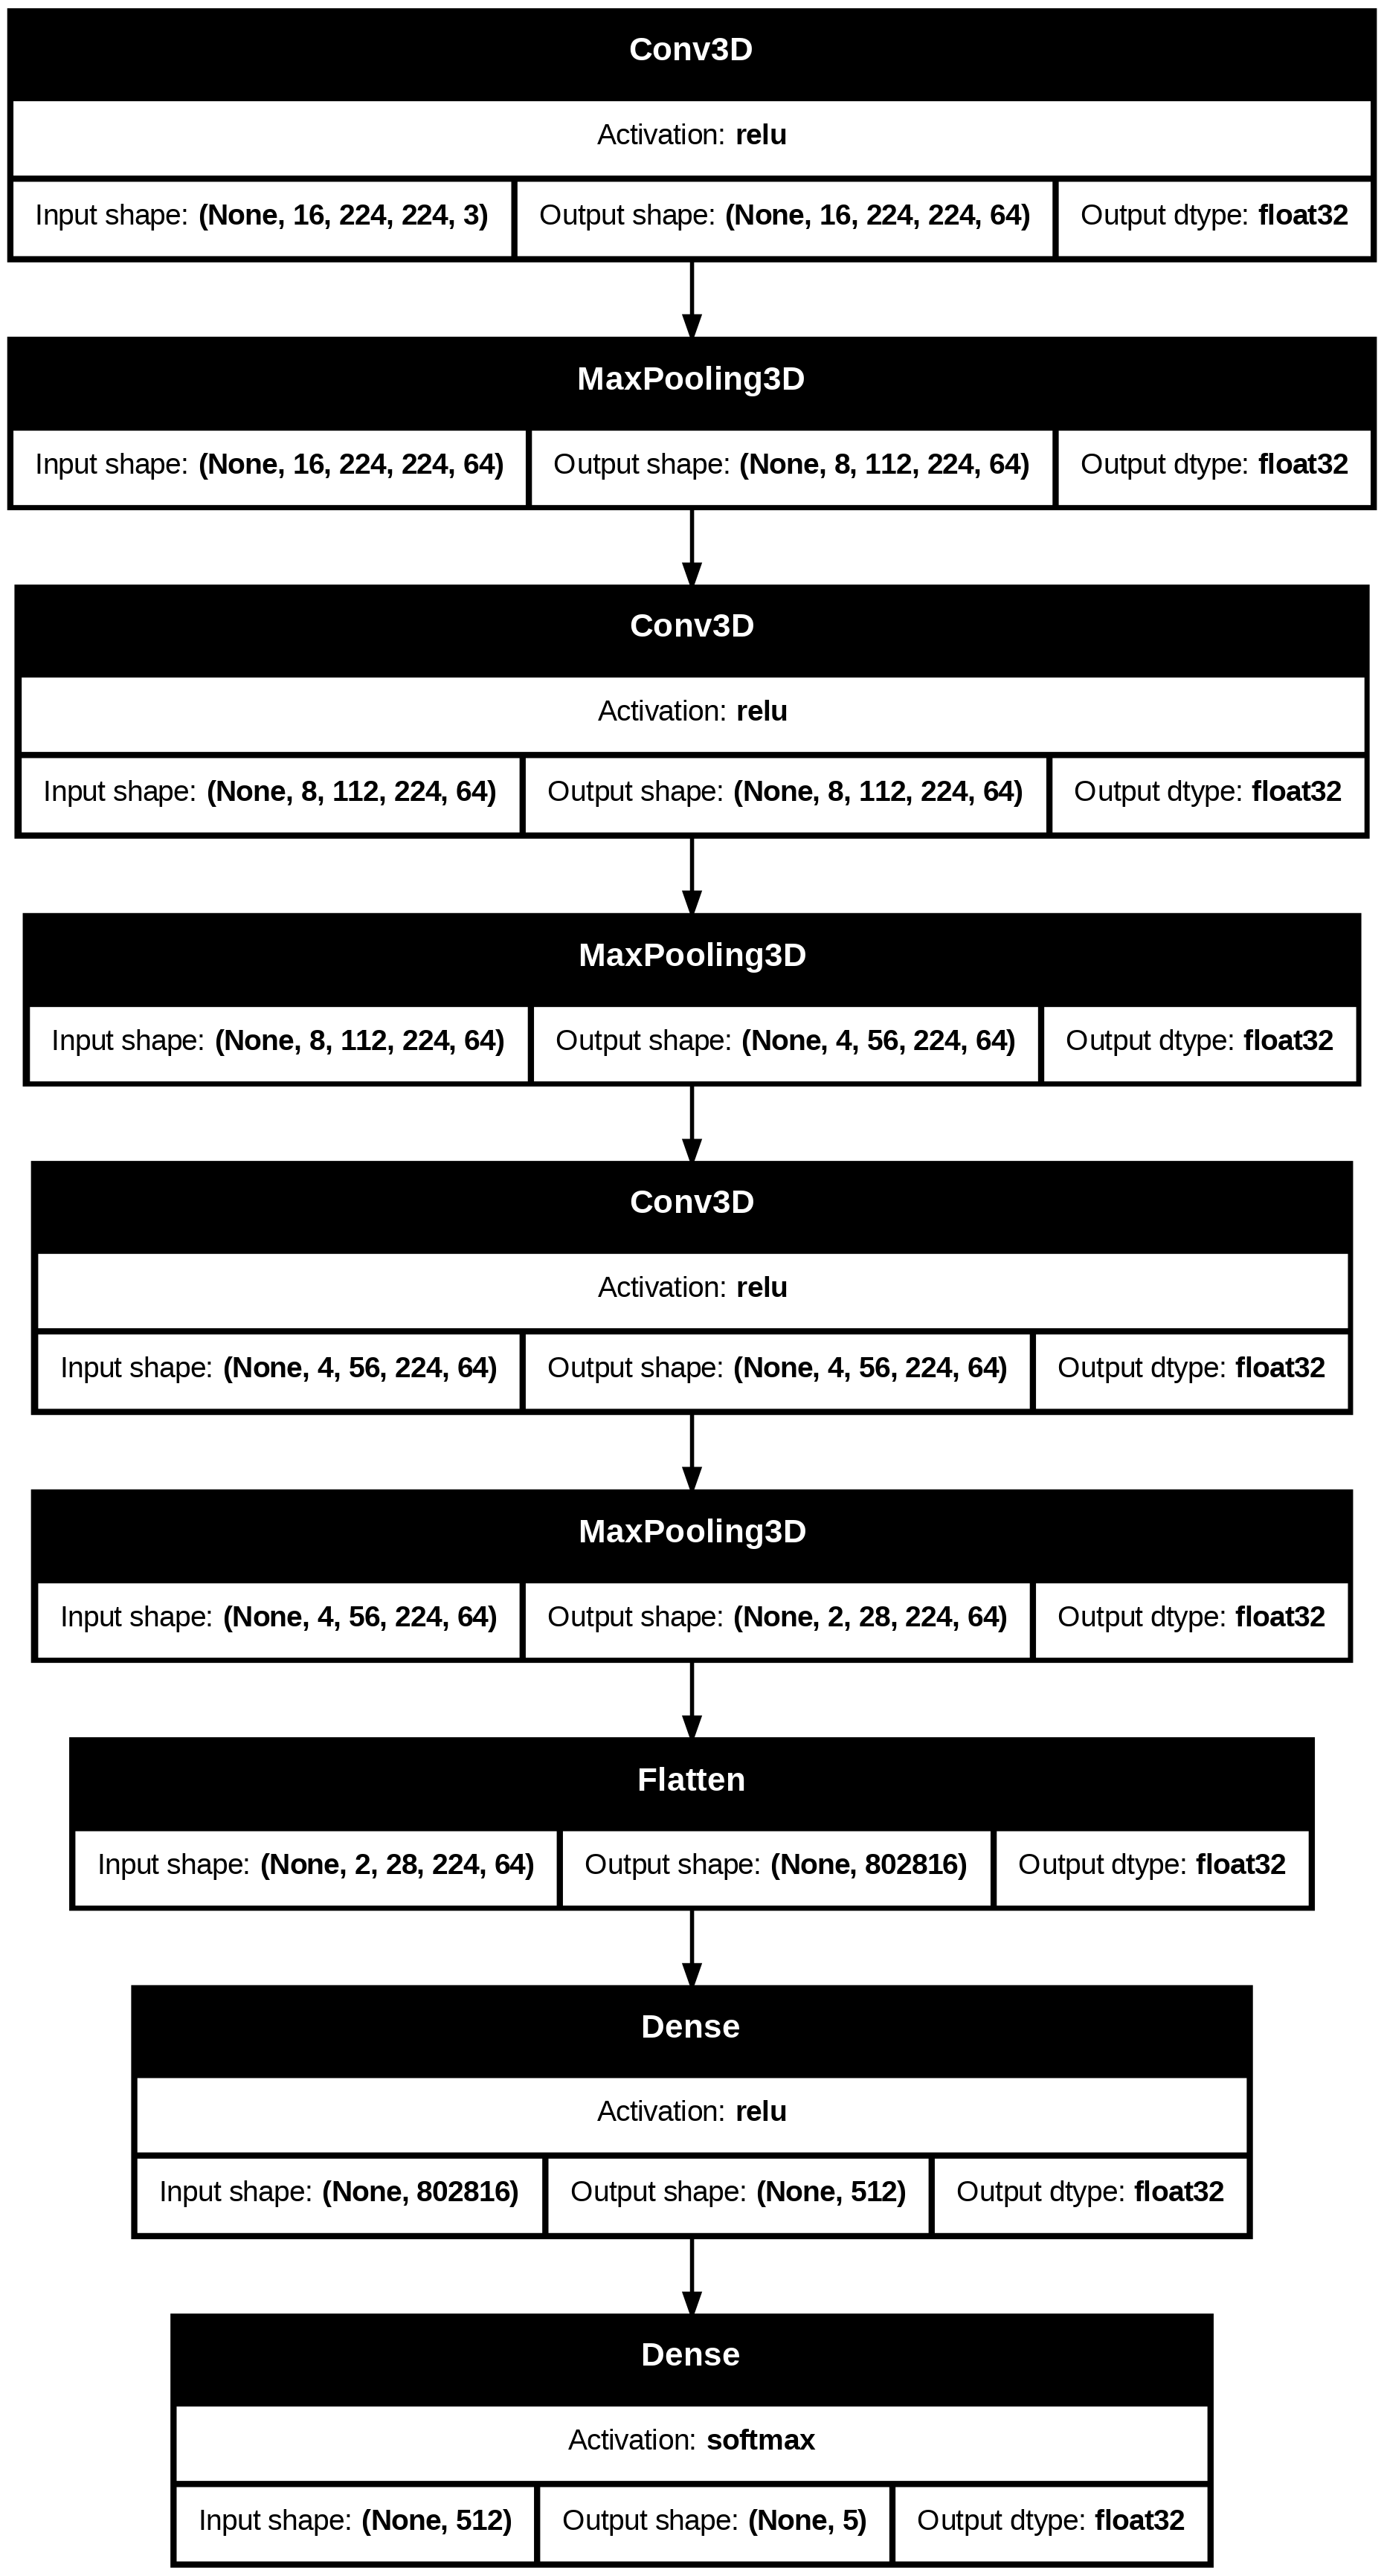

In [6]:
keras.utils.plot_model(
    model,
    show_shapes = True,
    show_dtype = True,
    show_layer_activations = True
)

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.save('Model.h5')
savedModel=load_model('Model.h5')

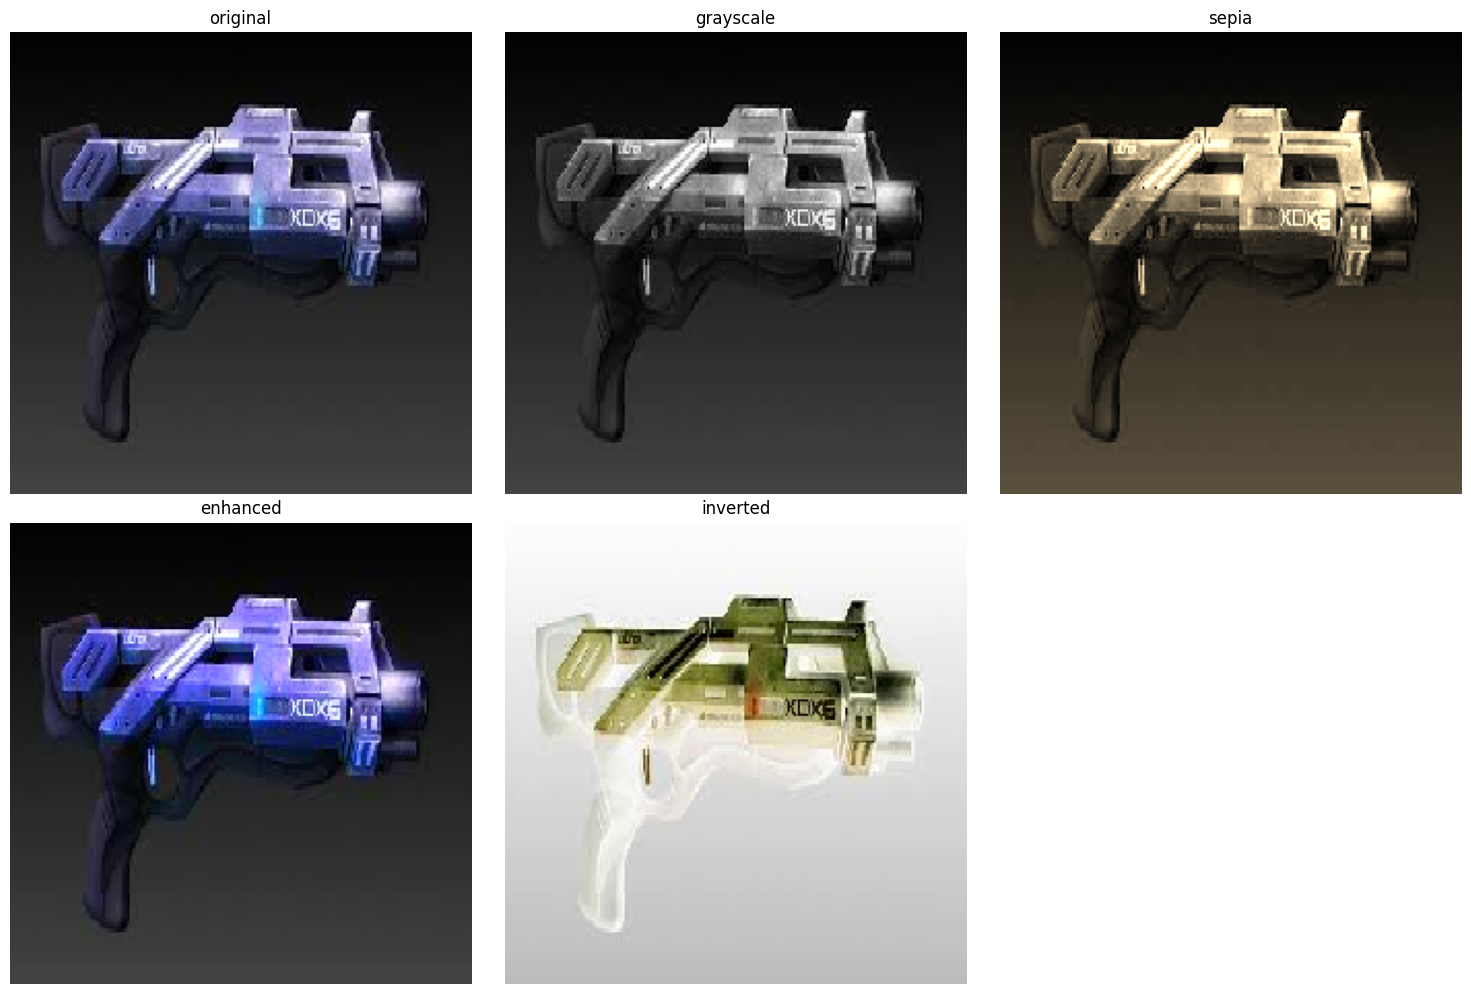

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageEnhance

class_names = ['Benelli', 'Beretta', 'Mossberg', 'Winchester', 'Remington']

def apply_color_pattern(img, pattern_type='original'):
    """Apply different color patterns to image"""
    pil_img = Image.fromarray(np.uint8(img))

    if pattern_type == 'grayscale':
        return pil_img.convert('L').convert('RGB')
    elif pattern_type == 'sepia':

        sepia_filter = np.array([
            [0.393, 0.769, 0.189],
            [0.349, 0.686, 0.168],
            [0.272, 0.534, 0.131]
        ])
        arr = np.array(pil_img).dot(sepia_filter.T)
        arr[arr > 255] = 255
        return Image.fromarray(arr.astype('uint8'))
    elif pattern_type == 'enhanced':
        enhancer = ImageEnhance.Color(pil_img)
        return enhancer.enhance(2.0)
    elif pattern_type == 'inverted':
        return Image.fromarray(255 - np.array(pil_img))
    else:
        return pil_img


test_image = image.load_img('/content/shotgun1.jpg', target_size=(224, 224))
img_array = image.img_to_array(test_image)

plt.figure(figsize=(15, 10))

color_patterns = ['original', 'grayscale', 'sepia', 'enhanced', 'inverted']

for i, pattern in enumerate(color_patterns):

    modified_img = apply_color_pattern(img_array, pattern)


    processed_img = image.img_to_array(modified_img) / 255.0
    processed_img = np.expand_dims(processed_img, axis=0)



    plt.subplot(2, 3, i+1)
    plt.imshow(modified_img)
    plt.title(f"{pattern}")
    plt.axis('off')

plt.tight_layout()
plt.show()

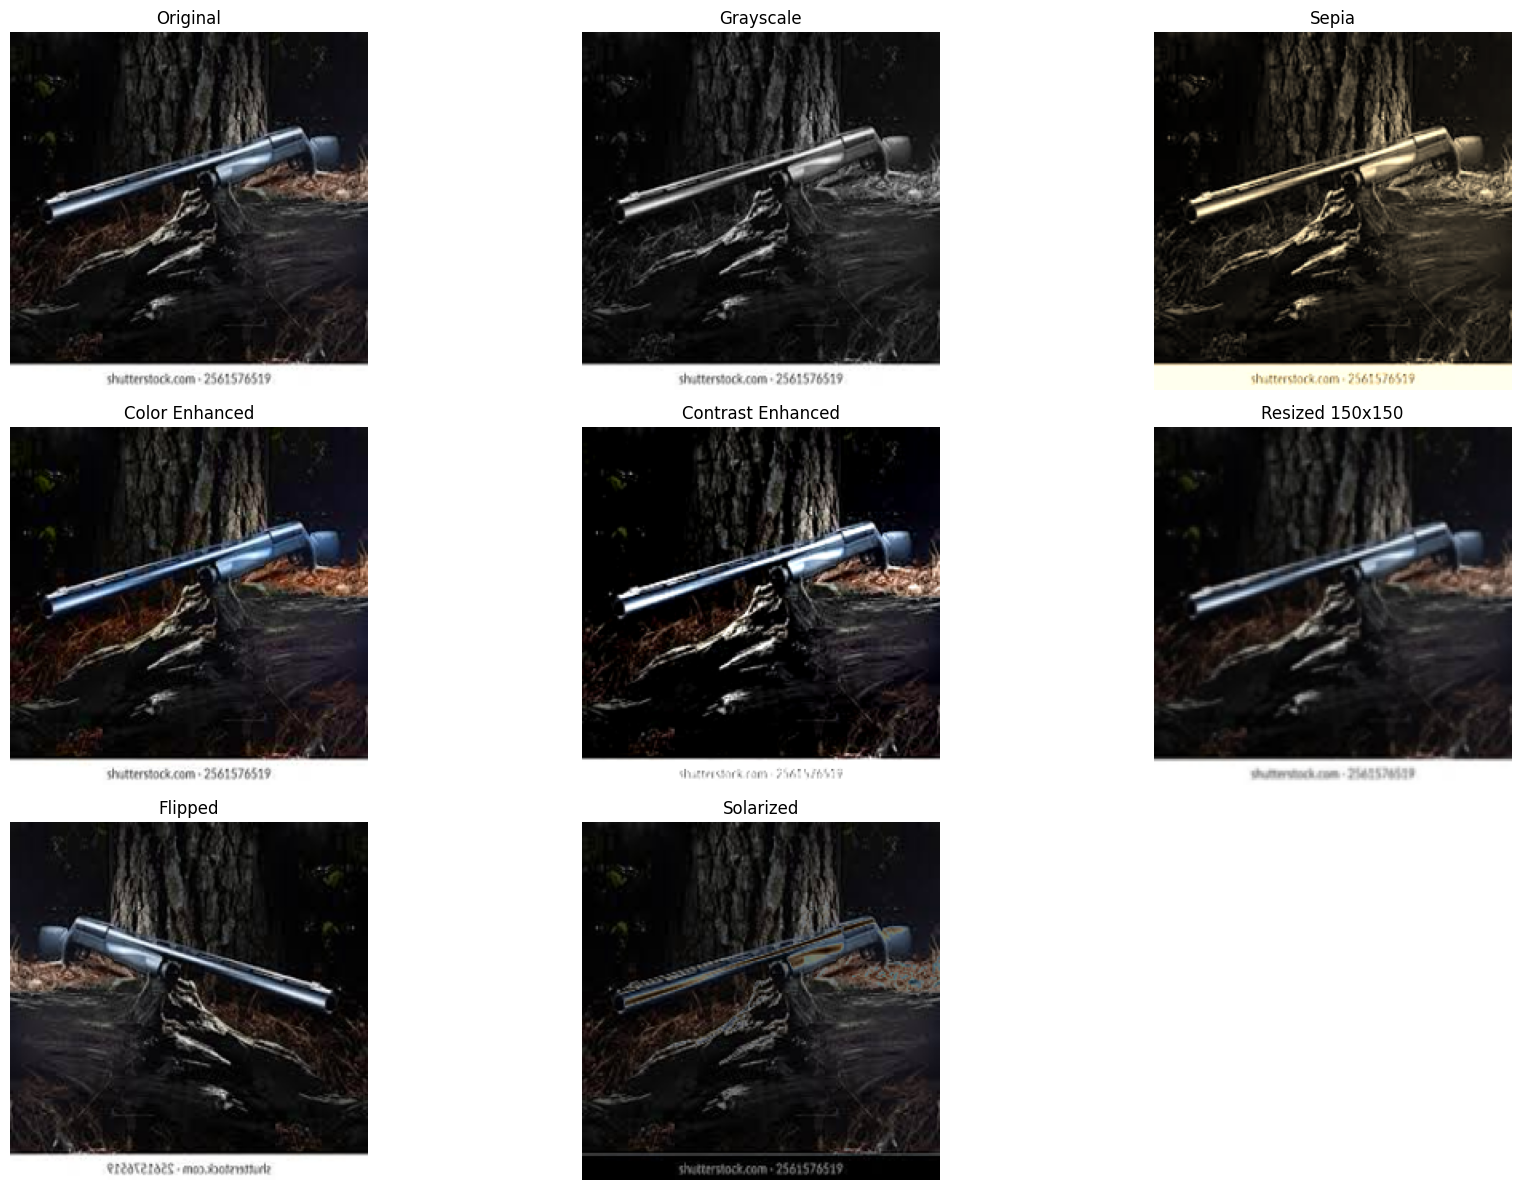

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps, ImageEnhance


list_ = ['Beretta', 'Winchester', 'Benelli', 'Remington', 'Mossberg']



orig_image = Image.open('/content/shotgun2.jpg')

plt.figure(figsize=(18, 12))

def apply_transformations(img, size=(224, 224)):
    transformations = {
        'Original': img,
        'Grayscale': ImageOps.grayscale(img).convert('RGB'),
        'Sepia': apply_sepia(img),
        'Color Enhanced': ImageEnhance.Color(img).enhance(2.0),
        'Contrast Enhanced': ImageEnhance.Contrast(img).enhance(1.5),
        'Resized 150x150': img.resize((150, 150)).resize(size),
        'Flipped': ImageOps.mirror(img),
        'Solarized': ImageOps.solarize(img, threshold=128)
    }
    return transformations

def apply_sepia(img):
    sepia_filter = np.array([
        [0.393, 0.769, 0.189],
        [0.349, 0.686, 0.168],
        [0.272, 0.534, 0.131]
    ])
    arr = np.array(img).dot(sepia_filter.T)
    arr[arr > 255] = 255
    return Image.fromarray(arr.astype('uint8'))

transformed_images = apply_transformations(orig_image)


for i, (name, img) in enumerate(transformed_images.items(), 1):

    if name == 'Resized 150x150':
        display_size = (150, 150)
    else:
        display_size = (224, 224)


    img_array = image.img_to_array(img.resize((224, 224))) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    plt.subplot(3, 3, i)
    plt.imshow(img.resize(display_size))
    plt.title(f"{name}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [31]:
import cv2
import os
from zipfile import ZipFile


zip_path = r"/content/png.zip"
extract_to = r"/content/png_extracted"
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

image_folder = os.path.join(extract_to, "png")
output_video = r"/content/output_video.mp4"


images = [img for img in os.listdir(image_folder) if img.lower().endswith(('.png', '.jpg'))]
if not images:
    raise ValueError(f"No images found in {image_folder}!")

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(output_video, fourcc, 24, (1280, 720))

for img_name in images:
    img_path = os.path.join(image_folder, img_name)
    frame = cv2.imread(img_path)
    if frame is not None:

        frame = cv2.resize(frame, (1280, 720))
        video.write(frame)
    else:
        print(f"Warning: Could not read {img_name}")

video.release()
print(f"Video saved to {output_video}")

Video saved to /content/output_video.mp4


In [36]:
import cv2
import os
from IPython.display import display, HTML, Video
from google.colab import files

def show_video(video_path):
    """Display a video file in Colab with multiple fallback methods"""
    if not os.path.exists(video_path):
        raise FileNotFoundError(f"Video file not found at {video_path}")

    try:
        display(HTML(f"""
        <div style="margin: 10px auto;">
        <video width="640" controls autoplay loop>
          <source src="{video_path}" type="video/mp4">
          Your browser does not support HTML5 video.
        </video>
        </div>
        """))
    except:
        try:
            display(Video(video_path, embed=True))
        except:
            cap = cv2.VideoCapture(video_path)
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                cv2_imshow(frame)
                if cv2.waitKey(25) & 0xFF == ord('q'):
                    break
            cap.release()

if not os.path.exists("/content/6090895-uhd_3840_2160_25fps (1).mp4"):
    uploaded = files.upload()
    video_path = list(uploaded.keys())[0]
else:
    video_path = "/content/6090895-uhd_3840_2160_25fps (1).mp4"

if " " in video_path:
    new_path = video_path.replace(" ", "_")
    os.rename(video_path, new_path)
    video_path = new_path

show_video(video_path)
files.download(video_path)

Saving 6090895-uhd_3840_2160_25fps_(1).mp4 to 6090895-uhd_3840_2160_25fps_(1) (1).mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>